In [6]:
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
%matplotlib inline

dataframe=pd.read_csv('dengue_features_train.csv')
labels=pd.read_csv('dengue_labels_train.csv')
target_df=pd.read_csv('dengue_features_test.csv')
submission_format=pd.read_csv('submission_format.csv')


def clean_data(df):
    #file.set_index('week_start_date', drop = True, inplace = True)
    df=df.drop(['city','week_start_date'], axis = 1, inplace = True)

def fill_missing_values(df):
    imputer = SimpleImputer(strategy="median") 
    imputer.fit(df)
    x=imputer.transform(df)
    return pd.DataFrame(x, columns=df.columns)

def split_data_in_cities(df):
    #cities=set(df['city'])
    cities=['sj','iq']
    new_files=[]
    for city in list(cities):
        new_files.append(df[df['city'] == city])

    return new_files

new_files=split_data_in_cities(dataframe)
new_labels=split_data_in_cities(labels)
new_target=split_data_in_cities(target_df)

sj_df=new_files[0]
iq_df=new_files[1]

sj_labels=new_labels[0]
iq_labels=new_labels[1]

sj_target=new_target[0]
iq_target=new_target[1]

clean_data(sj_df)
clean_data(iq_df)

sj_df=fill_missing_values(sj_df)
iq_df=fill_missing_values(iq_df)


new_labels[0]

C:\Users\Daniel\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6
5,sj,1990,23,2
6,sj,1990,24,4
7,sj,1990,25,5
8,sj,1990,26,10
9,sj,1990,27,6


In [3]:
#val1=np.array(sj_df['ndvi_ne'])
#val2=np.array(sj_df['ndvi_nw'])
#val3=np.array(sj_df['ndvi_sw'])
#val4=np.array(sj_df['ndvi_se'])
##lista=[]

In [62]:

#for i in range(len(val1)):
#    lista.append((val1[i]+val2[i]+val3[i]+val4[i])/4)

In [7]:

#sj_df['ndvi_ne']=np.array(lista)

In [59]:
x_sj_train, x_sj_test, y_sj_train, y_sj_test = train_test_split(sj_df, sj_labels['total_cases'], test_size=0.2)
x_iq_train, x_iq_test, y_iq_train, y_iq_test = train_test_split(iq_df, iq_labels['total_cases'], test_size=0.2)

In [61]:

model = RandomForestRegressor(n_estimators=61, random_state=53, criterion='mse').fit(x_sj_train, y_sj_train)
iq_model = RandomForestRegressor(n_estimators=61, random_state=53, criterion='mse').fit(x_iq_train, y_iq_train)
#second_model=SVR(kernel='rbf').fit(x_sj_train, y_sj_train)
predictions = model.predict(x_sj_test)
iq_prediction=iq_model.predict(x_iq_test)

#for i in range(0,len(predictions)):
#    if predictions[i]<0:
#        predictions[i]=0

print(mean_absolute_error(y_sj_test, predictions))
print(mean_absolute_error(y_iq_test, iq_prediction))


14.091123125217997
6.066677175283734


In [9]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(model.get_params())

Parameters currently in use:

{'bootstrap': True,
 'criterion': 'mae',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


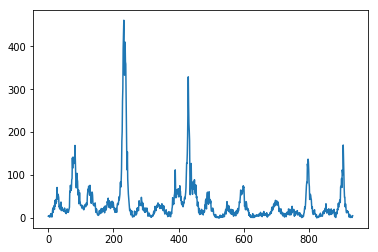

In [21]:
plt.plot(np.array(sj_labels['total_cases']))


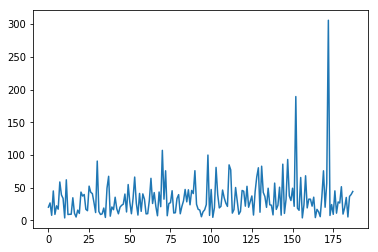

In [68]:
plt.plot(predictions)

In [69]:
clean_data(sj_target)
clean_data(iq_target)
sj_target=fill_missing_values(sj_target)
iq_target=fill_missing_values(iq_target)

sj_solution=model.predict(sj_target)
iq_soluton=iq_model.predict(iq_target)

C:\Users\Daniel\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [74]:
solution=list(sj_solution)
for x in iq_soluton:
    solution.append(x)
solution=np.array(solution)

In [80]:
solution=np.round(solution)

In [81]:
solution

array([  7,   5,   8,  11,   7,  11,   8,  12,  15,  20,  13,  21,  19,
        24,  50,  78,  60,  70, 131,  93,  79,  83,  80,  61,  79,  49,
        41,  61,  58,  28,  27,  41,  23,  21,  21,  19,  15,  14,  14,
        16,   9,  10,   8,   8,   7,   6,   5,   4,   5,   4,   6,   7,
         6,   5,   5,   5,  13,   7,   9,  15,  12,  19,  25,  24,  29,
        27,  46,  54,  74,  76, 115,  69,  90,  70,  95,  84,  81,  63,
        56,  44,  39,  73,  64,  45,  28,  32,  41,  34,  18,  16,  24,
        17,  11,  12,  13,  13,  12,   9,   9,  14,   9,  10,   6,   6,
        13,  13,   5,  16,  13,  27,  33,  36,  24,  28,  42,  38,  27,
        30,  48, 114,  82,  97, 105, 124,  95,  83,  83,  90, 109,  79,
        48,  50,  69,  30,  23,  21,  27,  21,  23,  23,  14,  19,  18,
        15,  12,  10,  11,   9,   8,   6,   6,   5,   6,   9,   6,   4,
         7,   6,   7,   6,  12,  14,  12,  24,  26,  29,  24,  28,  17,
        41,  26,  88,  82, 133,  78,  69,  62,  78,  91,  71,  8

In [82]:
submission_format['total_cases']=pd.DataFrame(solution)[0]

In [83]:
submission_format

,city,year,weekofyear,total_cases
0,sj,2008,18,7
1,sj,2008,19,5
2,sj,2008,20,8
3,sj,2008,21,11
4,sj,2008,22,7
5,sj,2008,23,11
6,sj,2008,24,8
7,sj,2008,25,12
8,sj,2008,26,15
9,sj,2008,27,20


In [86]:
submission_format.to_csv('submission.csv')